In [1]:
#librerias a utilizar para el modelo LSTM-RNN
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense


In [13]:
# Ruta al archivo en la carpeta Descargas (con barras invertidas)
file_path = 'C:\\Users\\eduar\\Downloads\\R410A_simulated_data.csv'

# Cargar los datos
data = pd.read_csv(file_path)

# Verificar los datos
print(data.head())


   Presión (bar)  Temperatura (°C)  Volumen específico (m³/kg)  \
0       1.687270         15.314292                    0.001642   
1       1.975357         21.364104                    0.001084   
2       1.865997         18.143560                    0.001162   
3       1.799329         20.085707                    0.001899   
4       1.578009         24.075665                    0.001606   

   Entalpía (kJ/kg)  Entropía (kJ/kg·K)  
0        402.584086            1.741250  
1        426.567732            2.061021  
2        427.031756            1.902101  
3        431.871495            2.030583  
4        436.304567            1.828020  


In [15]:
data

,Presión (bar),Temperatura (°C),Volumen específico (m³/kg),Entalpía (kJ/kg),Entropía (kJ/kg·K)
0,1.687270,15.314292,0.001642,402.584086,1.741250
1,1.975357,21.364104,0.001084,426.567732,2.061021
2,1.865997,18.143560,0.001162,427.031756,1.902101
3,1.799329,20.085707,0.001899,431.871495,2.030583
4,1.578009,24.075665,0.001606,436.304567,1.828020
...,...,...,...,...,...
95,1.746898,18.492096,0.001522,446.537866,1.841341
96,1.761366,22.259557,0.001770,442.920638,1.933462
97,1.713771,23.971103,0.001216,421.449701,1.731094
98,1.512710,23.870864,0.001623,437.543553,2.089758


In [17]:
# Verificar los datos
print(data.head())

   Presión (bar)  Temperatura (°C)  Volumen específico (m³/kg)  \
0       1.687270         15.314292                    0.001642   
1       1.975357         21.364104                    0.001084   
2       1.865997         18.143560                    0.001162   
3       1.799329         20.085707                    0.001899   
4       1.578009         24.075665                    0.001606   

   Entalpía (kJ/kg)  Entropía (kJ/kg·K)  
0        402.584086            1.741250  
1        426.567732            2.061021  
2        427.031756            1.902101  
3        431.871495            2.030583  
4        436.304567            1.828020  


In [27]:
# Mostrar los nombres de las columnas
print(data.columns)

Index(['Presión (bar)', 'Temperatura (°C)', 'Volumen específico (m³/kg)',
       'Entalpía (kJ/kg)', 'Entropía (kJ/kg·K)'],
      dtype='object')


In [35]:
# Supongamos que la columna 'pressure' contiene los datos de presión del gas
pressure_data = data['Presión (bar)'].values

In [37]:
pressure_data

array([1.68727006, 1.97535715, 1.86599697, 1.79932924, 1.57800932,
       1.57799726, 1.52904181, 1.93308807, 1.80055751, 1.85403629,
       1.51029225, 1.98495493, 1.91622132, 1.60616956, 1.59091248,
       1.59170225, 1.65212112, 1.76237822, 1.71597251, 1.64561457,
       1.80592645, 1.56974693, 1.64607232, 1.68318092, 1.72803499,
       1.89258798, 1.59983689, 1.75711722, 1.79620728, 1.52322521,
       1.80377243, 1.58526206, 1.5325258 , 1.97444277, 1.98281602,
       1.90419867, 1.65230688, 1.54883606, 1.84211651, 1.72007625,
       1.56101912, 1.74758846, 1.51719426, 1.9546602 , 1.62938999,
       1.83126114, 1.65585554, 1.76003401, 1.77335514, 1.59242723,
       1.98479231, 1.88756641, 1.96974947, 1.94741368, 1.79894999,
       1.96093712, 1.54424625, 1.59799143, 1.52261364, 1.66266517,
       1.69433864, 1.63567452, 1.91436875, 1.67837666, 1.64046725,
       1.77134804, 1.57046211, 1.90109849, 1.53727532, 1.99344347,
       1.88612238, 1.59935784, 1.50276106, 1.90773071, 1.85342

In [39]:
# Escalar los datos a un rango de 0 a 1
scaler = MinMaxScaler(feature_range=(0, 1))
pressure_data = scaler.fit_transform(pressure_data.reshape(-1, 1))

In [61]:
# Dividir los datos en entrenamiento y prueba
train_size = int(len(pressure_data) * 0.8)
train_data = pressure_data[:train_size]
test_data = pressure_data[train_size:]

In [85]:
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length])
    return np.array(sequences), np.array(labels)

sequence_length = 10  # Puedes ajustar este valor
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

In [87]:
# Verificar las formas de los datos
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(70, 10, 1) (70, 1)
(10, 10, 1) (10, 1)


In [109]:
# Construye el modelo LSTM utilizando Keras
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(units=100))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 10, 100)           40800     
                                                                 
 lstm_11 (LSTM)              (None, 100)               80400     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 121301 (473.83 KB)
Trainable params: 121301 (473.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/50
3/3 [==============================] - 5s 486ms/step - loss: 0.2859 - val_loss: 0.1353
Epoch 2/50
3/3 [==============================] - 0s 21ms/step - loss: 0.1496 - val_loss: 0.0844
Epoch 3/50
3/3 [==============================] - 0s 19ms/step - loss: 0.1062 - val_loss: 0.1366
Epoch 4/50
3/3 [==============================] - 0s 18ms/step - loss: 0.1262 - val_loss: 0.0923
Epoch 5/50
3/3 [==============================] - 0s 20ms/step - loss: 0.1048 - val_loss: 0.0797
Epoch 6/50
3/3 [==============================] - 0s 20ms/step - loss: 0.1040 - val_loss: 0.0776
Epoch 7/50
3/3 [==============================] - 0s 20ms/step - loss: 0.1052 - val_loss: 0.0776
Epoch 8/50
3/3 [==============================] - 0s 18ms/step - loss: 0.1037 - val_loss: 0.0796
Epoch 9/50
3/3 [==============================] - 0s 19ms/step - loss: 0.1043 - val_loss: 0.0826
Epoch 10/50
3/3 [==============================] - 0s 20ms/step - loss: 0.1028 - val_loss: 0.0794
Epoch 11/50
3/3 [===========

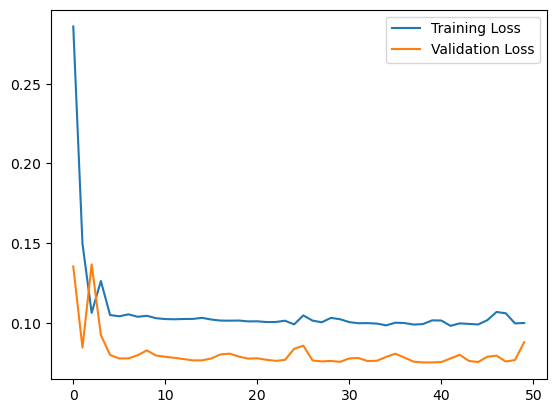

In [111]:
import matplotlib.pyplot as plt

# Entrena el modelo con los datos de entrenamiento
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Graficar la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


1/1 [==============================] - 1s 854ms/step


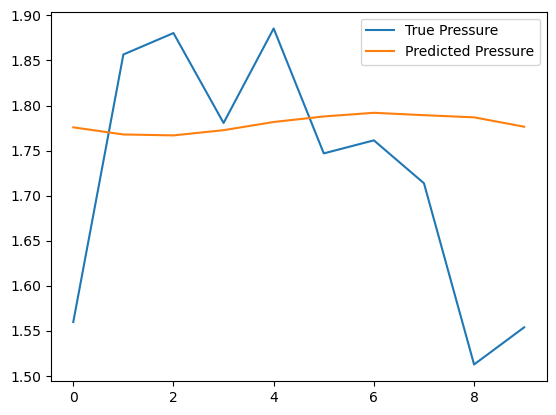

In [113]:
# Evalúa el modelo con los datos de prueba y realiza predicciones
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)

# Inversión de la escala de los datos de prueba para compararlos
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Graficar los resultados
plt.plot(y_test_scaled, label='True Pressure')
plt.plot(predicted, label='Predicted Pressure')
plt.legend()
plt.show()